In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# De scikit-learn...

In [ ]:
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')
ciudades = ['Sydney', 'SydneyAirport', 'Canberra','MelbourneAirport', 'Melbourne']
df2 = df[df['Location'].isin(ciudades)]
df2.drop(columns=['Unnamed: 0'],inplace=True)


<ipython-input-2-2410b6239382>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['Unnamed: 0'],inplace=True)


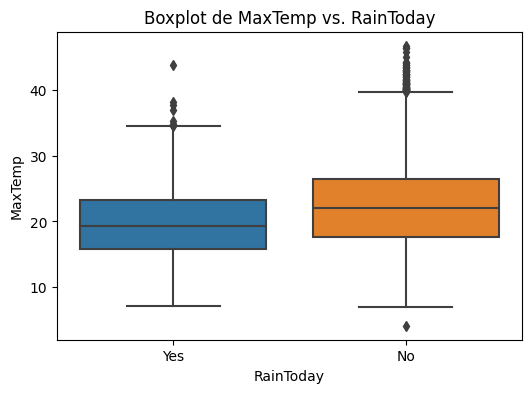

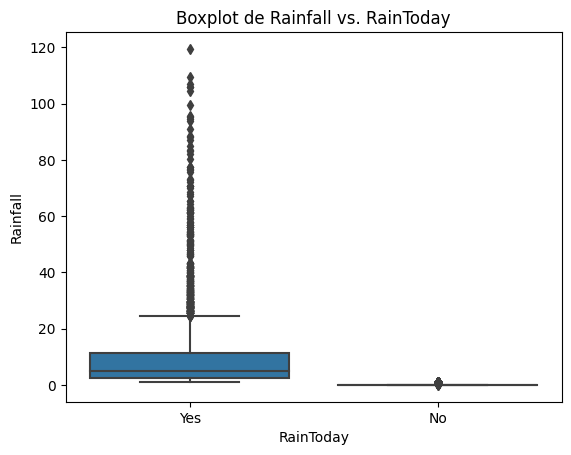

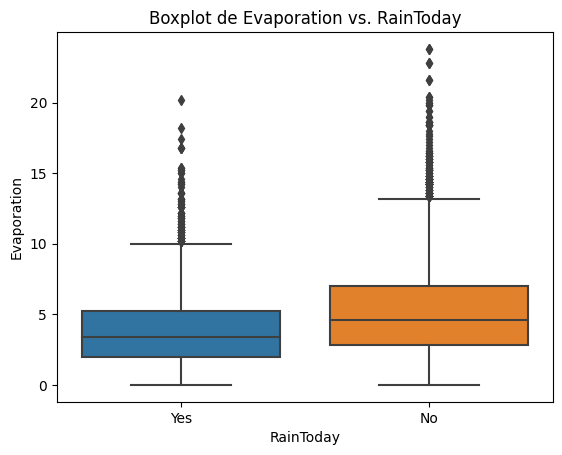

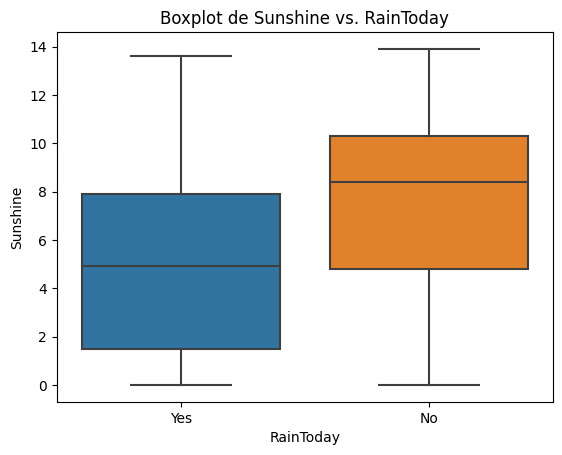

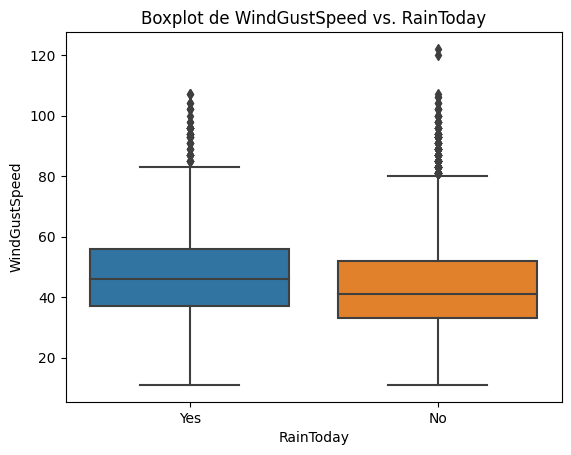

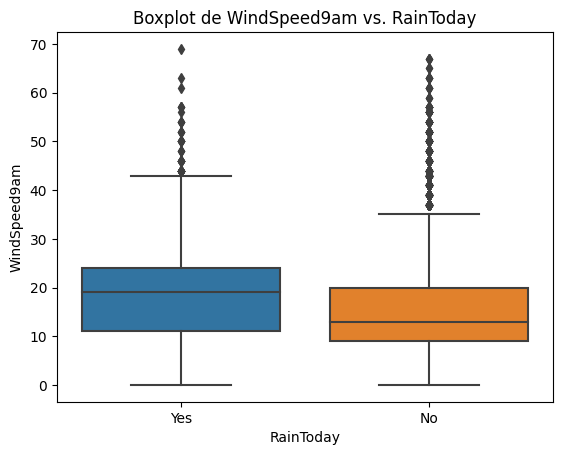

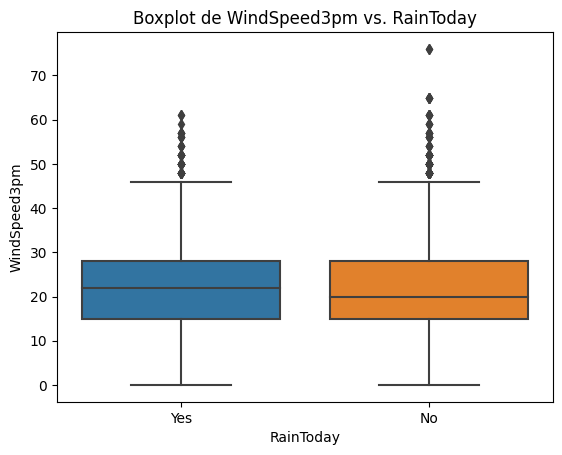

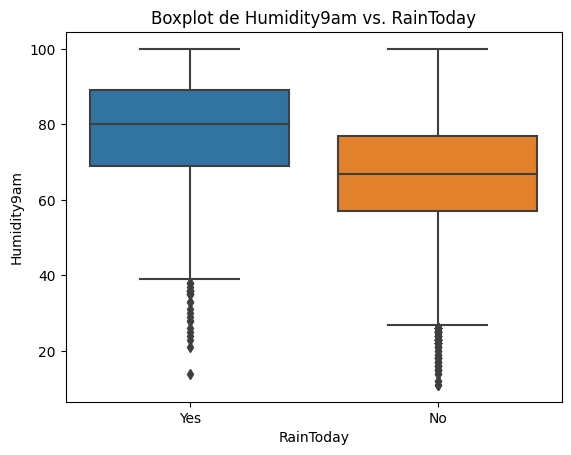

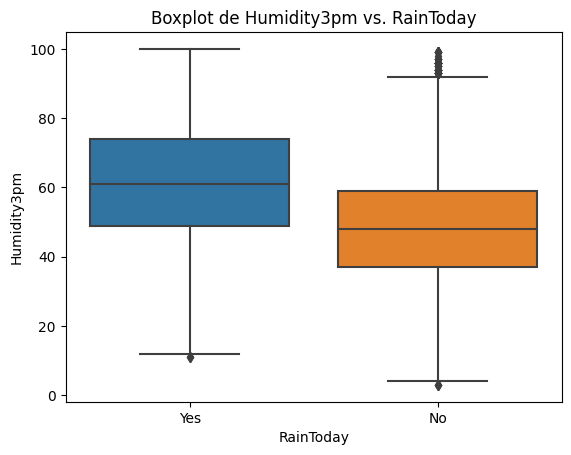

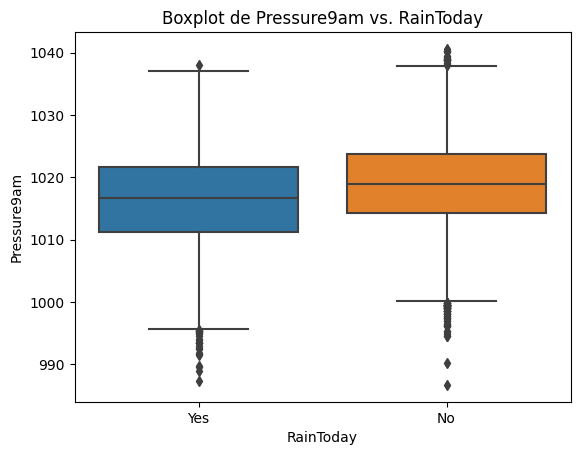

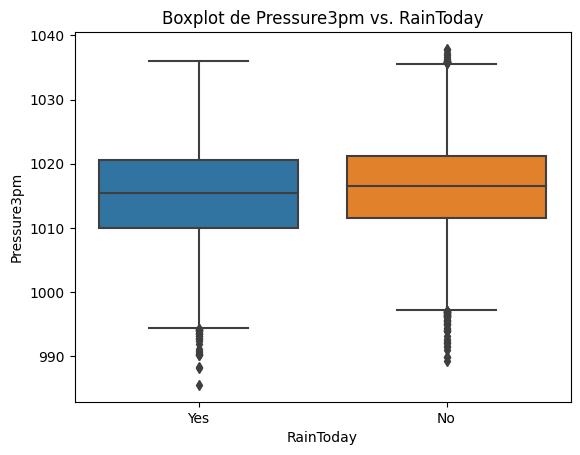

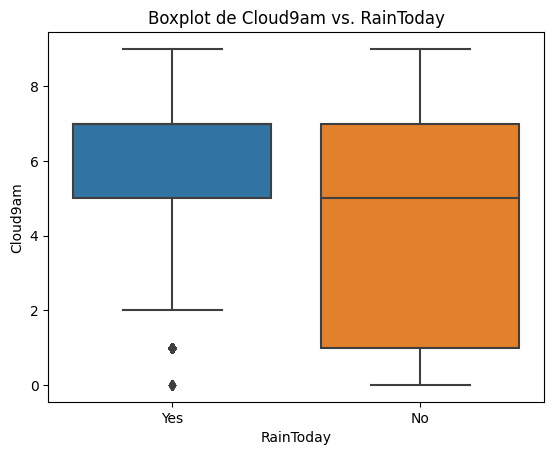

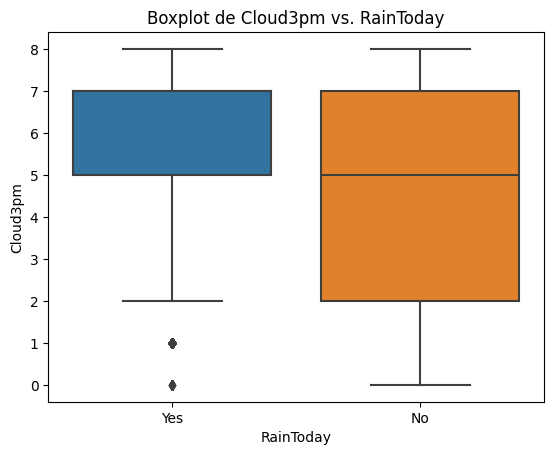

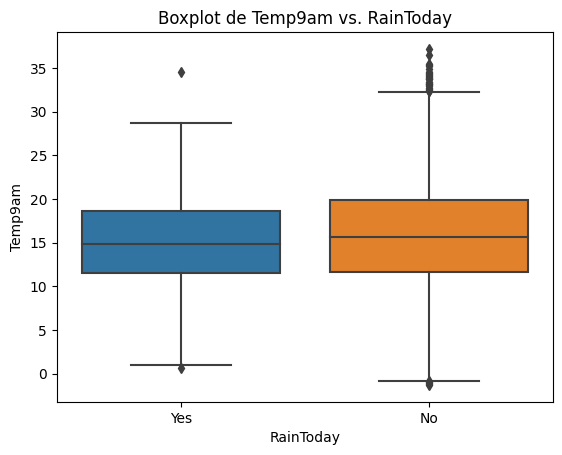

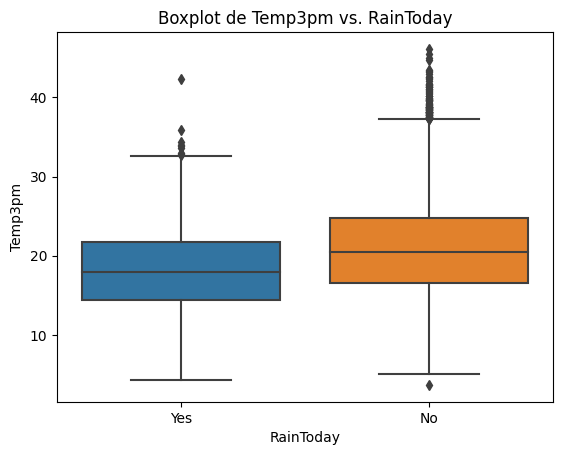

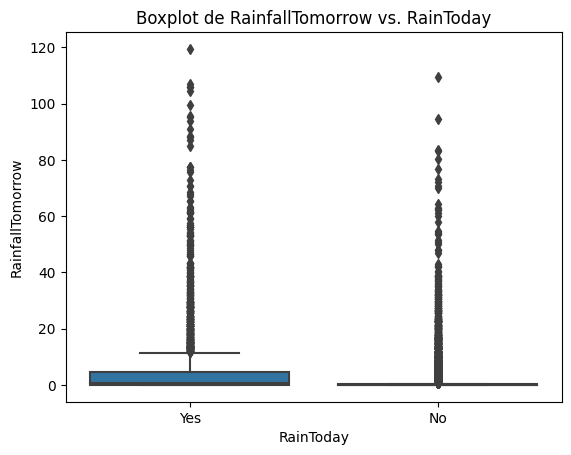

In [ ]:
plt.figure(figsize=(6, 4))

for column in df2.describe().columns[1:]:
    if column != 'RainToday':
        sns.boxplot(x='RainToday', y=column, data=df2)
        plt.title(f'Boxplot de {column} vs. RainToday')
        plt.ylabel(column)
        plt.show()

In [ ]:
df2.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


In [ ]:
### Cantidad de valores faltantes.
df2.isna().sum()

Date                   0
Location               0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

<ipython-input-6-f2e3f37d5a9a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr().select_dtypes(include=[np.number]).round(2), annot=True)


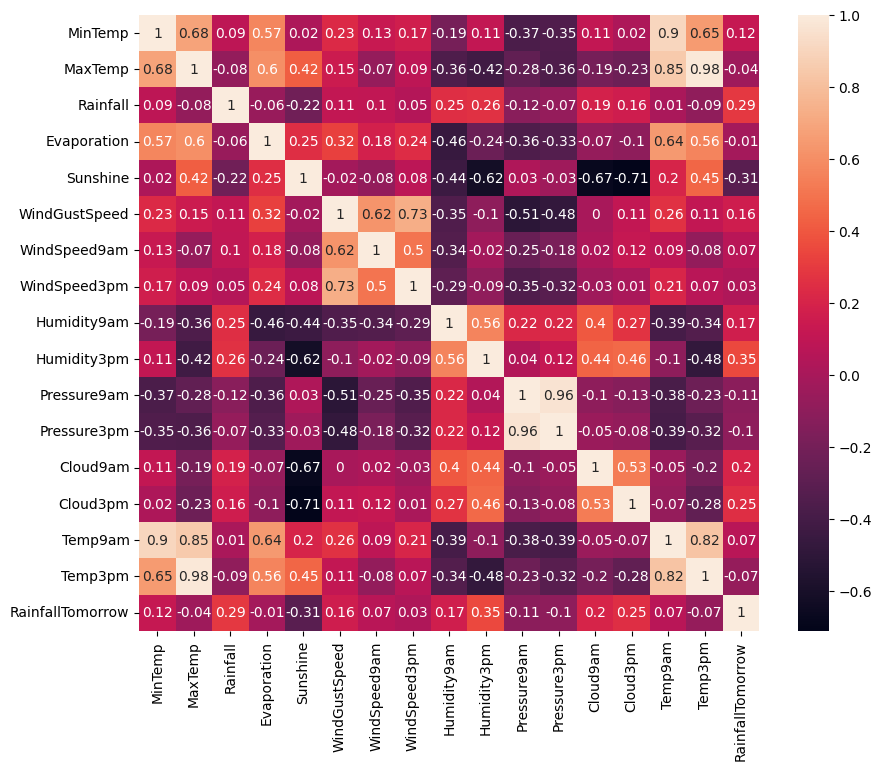

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df2.corr().select_dtypes(include=[np.number]).round(2), annot=True)

plt.show()

#Se puede ver un alta correlacion entre: <br>
*Pressure3pm y Pressure9am <br>
*Temp9am y MinTemp <br>
*Temp3pm y MaxTemp <br>
*Temp9am y MaxTemp <br>
Por eso decidimos sacar estas columnas: 'Temp9am','Temp3pm','Pressure9am'

In [ ]:
df3 = df2.drop(['Temp9am','Temp3pm','Pressure9am'], axis = 1)


Text(0.5, 1.0, 'RainToday Distribution')

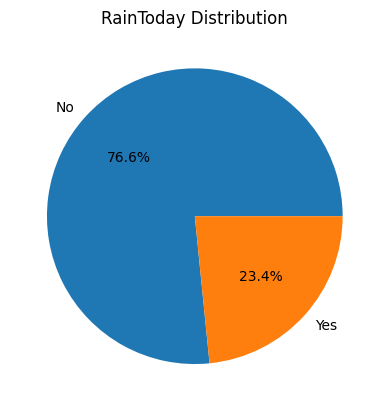

In [ ]:
rain_today_counts = df3['RainToday'].value_counts()

plt.pie(rain_today_counts, labels=rain_today_counts.index, autopct='%1.1f%%')

plt.title('RainToday Distribution')

#Está desbalanceado, una solución posible es hacer que los pesos en la LogisticRegression sean mayores en el Si que en el No


In [ ]:
ciudades_cercanas = {
    'Sydney': 'SydneyAirport',
    'SydneyAirport': 'Sydney',
    'MelbourneAirport': 'Melbourne',
    'Melbourne' : 'MelbourneAirport'
}

for index, row in df3.iterrows():
    for col in df3.columns:
        if pd.isna(row[col]):
            date = row['Date']
            location = row['Location']

            if location in ciudades_cercanas:
                ciudad_cercana = ciudades_cercanas[location]

                if ciudad_cercana in df3['Location'].values:
                    ciudad_cercana_data = df3[(df3['Location'] == ciudad_cercana) & (df3['Date'] == date)]

                    if not ciudad_cercana_data.empty:
                        df3.at[index, col] = ciudad_cercana_data[col].values[0]

In [ ]:
df_unica_localizacion = df3
ciudades_cercanas = {
    'Sydney': 'SydneyAirport',
    'SydneyAirport': 'Sydney',
    'MelbourneAirport': 'Melbourne',
    'Melbourne' : 'MelbourneAirport',
    'Sydney': 'Canberra',
    'SydneyAirport': 'Canberra',
    'MelbourneAirport': 'Canberra',
    'Melbourne' : 'Canberra',
    'Canberra' : 'Sydney',
    'Canberra' : 'SydneyAirport',
    'Canberra' : 'Melbourne',
    'Canberra' : 'MelbourneAirport',
}
for i in range(2):
  df_unica_localizacion = df3
  for index, row in df_unica_localizacion.iterrows():
      for col in df_unica_localizacion.columns:
          if pd.isna(row[col]):
              date = row['Date']
              location = row['Location']

              if location in ciudades_cercanas:
                  ciudad_cercana = ciudades_cercanas[location]

                  if ciudad_cercana in df_unica_localizacion['Location'].values:
                      ciudad_cercana_data = df_unica_localizacion[(df_unica_localizacion['Location'] == ciudad_cercana) & (df_unica_localizacion['Date'] == date)]

                      if not ciudad_cercana_data.empty:
                          df_unica_localizacion.at[index, col] = ciudad_cercana_data[col].values[0]

In [ ]:
from sklearn.impute import KNNImputer
df_unica_localizacion_numerico = df_unica_localizacion.select_dtypes(include=['float64'])
columns = df_unica_localizacion_numerico.columns
indices = df_unica_localizacion_numerico.index



In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_unica_localizacion_numerico = imputer.fit_transform(df_unica_localizacion_numerico)

In [ ]:
df_unica_localizacion_numerico = pd.DataFrame(df_unica_localizacion_numerico, columns = columns, index = indices)
df_unica_localizacion_numerico

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainfallTomorrow
30167,19.5,22.4,15.6,6.2,0.0,30.0,17.0,20.0,92.0,84.0,1017.4,8.0,8.0,6.0
30168,19.5,25.6,6.0,3.4,2.7,30.0,9.0,13.0,83.0,73.0,1016.4,7.0,7.0,6.6
30169,21.6,24.5,6.6,2.4,0.1,48.0,17.0,2.0,88.0,86.0,1015.6,7.0,8.0,18.8
30170,20.2,22.8,18.8,2.2,0.0,33.0,22.0,20.0,83.0,90.0,1011.8,8.0,8.0,77.4
30171,19.7,25.7,77.4,2.8,0.0,30.0,11.0,6.0,88.0,74.0,1004.8,8.0,8.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70366,6.4,15.8,0.0,2.4,8.8,39.0,11.0,17.0,84.0,56.0,1024.5,1.0,7.0,0.6
70367,7.8,13.5,0.6,0.6,0.0,24.0,2.0,9.0,100.0,80.0,1028.4,7.0,7.0,0.2
70368,6.7,14.1,0.2,0.6,0.0,24.0,9.0,11.0,93.0,56.0,1024.8,7.0,7.0,0.0
70369,7.4,14.9,0.0,1.6,6.0,44.0,17.0,19.0,77.0,63.0,1013.8,1.0,7.0,1.4


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_unica_localizacion_numerico)
df_scaled = pd.DataFrame(scaled_data, columns=df_unica_localizacion_numerico.columns)

In [ ]:
df_unica_localizacion.reset_index(drop=True, inplace=True)
df_scaled['WindGustDir'] = df_unica_localizacion['WindGustDir']
df_scaled['WindDir3pm'] = df_unica_localizacion['WindDir3pm']
df_scaled['RainToday'] = df_unica_localizacion['RainToday']
df_scaled['RainTomorrow'] = df_unica_localizacion['RainTomorrow']


In [ ]:
df_scaled

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainfallTomorrow,WindGustDir,WindDir3pm,RainToday,RainTomorrow
0,1.360521,0.104982,1.825834,0.432636,-1.770977,-0.972338,0.030161,-0.194064,1.475789,1.850606,0.180976,1.177649,1.248030,0.510980,SSE,SSW,Yes,Yes
1,1.360521,0.630325,0.510779,-0.468246,-1.070736,-0.972338,-0.739122,-0.927942,0.900389,1.230790,0.043304,0.808514,0.858191,0.593179,NNE,E,Yes,Yes
2,1.721380,0.449739,0.592970,-0.789989,-1.745042,0.229781,0.030161,-2.081178,1.220055,1.963300,-0.066834,0.808514,1.248030,2.264559,E,ESE,Yes,Yes
3,1.480808,0.170650,2.264185,-0.854338,-1.770977,-0.771985,0.510962,-0.194064,0.900389,2.188688,-0.589986,1.177649,1.248030,10.292662,ENE,E,Yes,Yes
4,1.394889,0.646742,10.291499,-0.661292,-1.770977,-0.972338,-0.546801,-1.661819,1.220055,1.287137,-1.553689,1.177649,1.248030,-0.091813,ESE,W,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,-0.890549,-0.978539,-0.311130,-0.789989,0.511291,-0.371279,-0.546801,-0.508583,0.964322,0.272891,1.158445,-1.406298,0.858191,-0.228811,N,N,No,No
15982,-0.649977,-1.356129,-0.228939,-1.369128,-1.770977,-1.373045,-1.412244,-1.347300,1.987255,1.625218,1.695365,0.808514,0.858191,-0.283610,NNW,S,No,No
15983,-0.838998,-1.257627,-0.283733,-1.369128,-1.770977,-1.373045,-0.739122,-1.137621,1.539722,0.272891,1.199747,0.808514,0.858191,-0.311010,N,N,No,No
15984,-0.718712,-1.126292,-0.311130,-1.047384,-0.214885,-0.037357,0.030161,-0.298904,0.516789,0.667320,-0.314643,-1.406298,0.858191,-0.119212,NNW,N,No,Yes


In [ ]:
df_scaled.dropna(inplace=True)

In [ ]:
df_scaled['WindGustDir'] = df_scaled['WindGustDir'].str[0]
df_scaled['WindDir3pm'] = df_scaled['WindDir3pm'].str[0]

In [ ]:
df_encoded = pd.get_dummies(df_scaled, columns=['WindGustDir','WindDir3pm'])


In [ ]:
df_encoded['RainToday'] = df_encoded['RainToday'].replace({'Yes': 1, 'No': 0})
df_encoded['RainTomorrow'] = df_encoded['RainTomorrow'].replace({'Yes': 1, 'No': 0})


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_encoded.drop(['RainfallTomorrow'], axis=1)

y_rainfall_tomorrow = df_encoded['RainfallTomorrow']


X_train, X_test, y_train_rainfall_tomorrow, y_test_rainfall_tomorrow = train_test_split(X, y_rainfall_tomorrow, test_size=0.2, random_state=42)

model_rainfall_tomorrow = LinearRegression()
model_rainfall_tomorrow.fit(X_train, y_train_rainfall_tomorrow)


y_pred_rainfall_tomorrow = model_rainfall_tomorrow.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_rainfall_tomorrow = mean_squared_error(y_test_rainfall_tomorrow, y_pred_rainfall_tomorrow)
r2_rainfall_tomorrow = r2_score(y_test_rainfall_tomorrow, y_pred_rainfall_tomorrow)


print(f'MSE Rainfall Tomorrow: {mse_rainfall_tomorrow}')
print(f'R^2 Rainfall Tomorrow: {r2_rainfall_tomorrow}')


MSE Rainfall Tomorrow: 0.7386841274173966
R^2 Rainfall Tomorrow: 0.3247274927498768


In [ ]:
df_encoded

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
0,1.360521,0.104982,1.825834,0.432636,-1.770977,-0.972338,0.030161,-0.194064,1.475789,1.850606,...,1,1,0,0,1,0,0,0,1,0
1,1.360521,0.630325,0.510779,-0.468246,-1.070736,-0.972338,-0.739122,-0.927942,0.900389,1.230790,...,1,1,0,1,0,0,1,0,0,0
2,1.721380,0.449739,0.592970,-0.789989,-1.745042,0.229781,0.030161,-2.081178,1.220055,1.963300,...,1,1,1,0,0,0,1,0,0,0
3,1.480808,0.170650,2.264185,-0.854338,-1.770977,-0.771985,0.510962,-0.194064,0.900389,2.188688,...,1,1,1,0,0,0,1,0,0,0
4,1.394889,0.646742,10.291499,-0.661292,-1.770977,-0.972338,-0.546801,-1.661819,1.220055,1.287137,...,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,-0.890549,-0.978539,-0.311130,-0.789989,0.511291,-0.371279,-0.546801,-0.508583,0.964322,0.272891,...,0,0,0,1,0,0,0,1,0,0
15982,-0.649977,-1.356129,-0.228939,-1.369128,-1.770977,-1.373045,-1.412244,-1.347300,1.987255,1.625218,...,0,0,0,1,0,0,0,0,1,0
15983,-0.838998,-1.257627,-0.283733,-1.369128,-1.770977,-1.373045,-0.739122,-1.137621,1.539722,0.272891,...,0,0,0,1,0,0,0,1,0,0
15984,-0.718712,-1.126292,-0.311130,-1.047384,-0.214885,-0.037357,0.030161,-0.298904,0.516789,0.667320,...,0,1,0,1,0,0,0,1,0,0


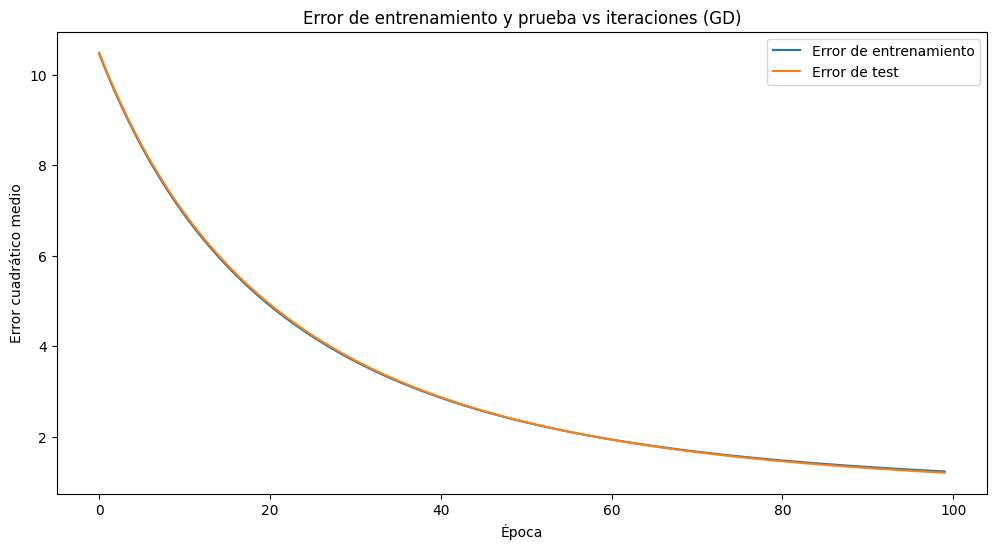

In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W


X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('RainfallTomorrow', axis=1),
                                             df_encoded['RainfallTomorrow'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,
                                             )
w = gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100)


Regularizacion

In [ ]:
X = df_encoded.drop(columns='RainfallTomorrow')
y = df_encoded['RainfallTomorrow']

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV

lassoCV = LassoCV()  # alpha controla la fuerza de la regularización L1 (Lasso)
ridgeCV = RidgeCV()  # alpha controla la fuerza de la regularización L2 (Ridge)
elasticnetCV = ElasticNetCV()

# Ajustar modelos a los datos
lassoCV.fit(X, y)
ridgeCV.fit(X, y)
elasticnetCV.fit(X,y)

#Mostrar alphas
print(lassoCV.alpha_)
print(ridgeCV.alpha_)
print(elasticnetCV.alpha_ )

# Mostrar coeficientes
print("\nCoeficientes del modelo Lasso:")
print(lassoCV.score(X,y))
print(lassoCV.score(X,y))

print("\nCoeficientes del modelo Ridge:")
print(ridgeCV.score(X,y))


print("\nCoeficientes del modelo ElasticNet:")
print(elasticnetCV.score(X,y))


0.00034320734969566744
10.0
0.000686414699391335

Coeficientes del modelo Lasso:
0.34924968988944516
0.34924968988944516

Coeficientes del modelo Ridge:
0.34926194588177517

Coeficientes del modelo ElasticNet:
0.3492459349749588
